## 1. Importing libraries

In [31]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset

## 2. Torch exploration

### 2.1 Tensores

In [2]:
d =torch.zeros((5,5))
d

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [74]:
torch.zeros?
# Keep an eye for device and requires_grad

Docstring:
zeros(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor

Returns a tensor filled with the scalar value `0`, with the shape defined
by the variable argument :attr:`size`.

Args:
    size (int...): a sequence of integers defining the shape of the output tensor.
        Can be a variable number of arguments or a collection like a list or tuple.

Keyword args:
    out (Tensor, optional): the output tensor.
    dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
        Default: if ``None``, uses a global default (see :func:`torch.set_default_dtype`).
    layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
        Default: ``torch.strided``.
    device (:class:`torch.device`, optional): the desired device of returned tensor.
        Default: if ``None``, uses the current device for the default tensor type
        (see :func:`torch.set_default_device`). :attr:`device` will be

In [4]:
type(d)

torch.Tensor

In [7]:
tensor = torch.tensor([[1, 2, 3], [4, 5, 6]])

In [8]:
tensor.numpy()

array([[1, 2, 3],
       [4, 5, 6]])

In [9]:
torch.Tensor?

Init signature: torch.Tensor(self, /, *args, **kwargs)
Docstring:      <no docstring>
File:           ~/Desktop/Projects/.venv/lib/python3.8/site-packages/torch/__init__.py
Type:           _TensorMeta
Subclasses:     SparseSemiStructuredTensor, Parameter, UninitializedBuffer, MaskedTensor, FakeTensor, FunctionalTensor

In [18]:
m = torch.Tensor([1,2,3])
m.numpy()

array([1., 2., 3.], dtype=float32)

array([1, 2, 3])

In [10]:
torch.tensor?

Docstring:
tensor(data, *, dtype=None, device=None, requires_grad=False, pin_memory=False) -> Tensor

Constructs a tensor with no autograd history (also known as a "leaf tensor", see :doc:`/notes/autograd`) by copying :attr:`data`.

.. warning::

    When working with tensors prefer using :func:`torch.Tensor.clone`,
    :func:`torch.Tensor.detach`, and :func:`torch.Tensor.requires_grad_` for
    readability. Letting `t` be a tensor, ``torch.tensor(t)`` is equivalent to
    ``t.clone().detach()``, and ``torch.tensor(t, requires_grad=True)``
    is equivalent to ``t.clone().detach().requires_grad_(True)``.

.. seealso::

    :func:`torch.as_tensor` preserves autograd history and avoids copies where possible.
    :func:`torch.from_numpy` creates a tensor that shares storage with a NumPy array.

Args:
    data (array_like): Initial data for the tensor. Can be a list, tuple,
        NumPy ``ndarray``, scalar, and other types.

Keyword args:
    dtype (:class:`torch.dtype`, optional): the de

### 2.2 nn

In [19]:
nn?

Type:        module
String form: <module 'torch.nn' from '/Users/abhishekde/Desktop/Projects/.venv/lib/python3.8/site-packages/torch/nn/__init__.py'>
File:        ~/Desktop/Projects/.venv/lib/python3.8/site-packages/torch/nn/__init__.py
Docstring:   <no docstring>

In [20]:
nn.Linear?

Init signature:
nn.Linear(
    in_features: int,
    out_features: int,
    bias: bool = True,
    device=None,
    dtype=None,
) -> None
Docstring:     
Applies a linear transformation to the incoming data: :math:`y = xA^T + b`.

This module supports :ref:`TensorFloat32<tf32_on_ampere>`.

On certain ROCm devices, when using float16 inputs this module will use :ref:`different precision<fp16_on_mi200>` for backward.

Args:
    in_features: size of each input sample
    out_features: size of each output sample
    bias: If set to ``False``, the layer will not learn an additive bias.
        Default: ``True``

Shape:
    - Input: :math:`(*, H_{in})` where :math:`*` means any number of
      dimensions including none and :math:`H_{in} = \text{in\_features}`.
    - Output: :math:`(*, H_{out})` where all but the last dimension
      are the same shape as the input and :math:`H_{out} = \text{out\_features}`.

Attributes:
    weight: the learnable weights of the module of shape
        :math:`

In [23]:
lin_layer = nn.Linear(in_features = 5, out_features=1, bias=True)

In [25]:
nn.Module?

Init signature: nn.Module(*args, **kwargs) -> None
Docstring:     
Base class for all neural network modules.

Your models should also subclass this class.

Modules can also contain other Modules, allowing to nest them in
a tree structure. You can assign the submodules as regular attributes::

    import torch.nn as nn
    import torch.nn.functional as F

    class Model(nn.Module):
        def __init__(self):
            super().__init__()
            self.conv1 = nn.Conv2d(1, 20, 5)
            self.conv2 = nn.Conv2d(20, 20, 5)

        def forward(self, x):
            x = F.relu(self.conv1(x))
            return F.relu(self.conv2(x))

Submodules assigned in this way will be registered, and will have their
parameters converted too when you call :meth:`to`, etc.

.. note::
    As per the example above, an ``__init__()`` call to the parent class
    must be made before assignment on the child.

:ivar training: Boolean represents whether this module is in training or
                ev

In [27]:
class Model(nn.Module):
    def __init__(self):
        super().__init__() # initialize the base class
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        return F.relu(self.conv2(x))
    
dummy_model = Model()

In [28]:
dummy_model.eval()

Model(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 20, kernel_size=(5, 5), stride=(1, 1))
)

In [29]:
dir(nn)

['AdaptiveAvgPool1d',
 'AdaptiveAvgPool2d',
 'AdaptiveAvgPool3d',
 'AdaptiveLogSoftmaxWithLoss',
 'AdaptiveMaxPool1d',
 'AdaptiveMaxPool2d',
 'AdaptiveMaxPool3d',
 'AlphaDropout',
 'AvgPool1d',
 'AvgPool2d',
 'AvgPool3d',
 'BCELoss',
 'BCEWithLogitsLoss',
 'BatchNorm1d',
 'BatchNorm2d',
 'BatchNorm3d',
 'Bilinear',
 'CELU',
 'CTCLoss',
 'ChannelShuffle',
 'CircularPad1d',
 'CircularPad2d',
 'CircularPad3d',
 'ConstantPad1d',
 'ConstantPad2d',
 'ConstantPad3d',
 'Container',
 'Conv1d',
 'Conv2d',
 'Conv3d',
 'ConvTranspose1d',
 'ConvTranspose2d',
 'ConvTranspose3d',
 'CosineEmbeddingLoss',
 'CosineSimilarity',
 'CrossEntropyLoss',
 'CrossMapLRN2d',
 'DataParallel',
 'Dropout',
 'Dropout1d',
 'Dropout2d',
 'Dropout3d',
 'ELU',
 'Embedding',
 'EmbeddingBag',
 'FeatureAlphaDropout',
 'Flatten',
 'Fold',
 'FractionalMaxPool2d',
 'FractionalMaxPool3d',
 'GELU',
 'GLU',
 'GRU',
 'GRUCell',
 'GaussianNLLLoss',
 'GroupNorm',
 'Hardshrink',
 'Hardsigmoid',
 'Hardswish',
 'Hardtanh',
 'HingeEmbed

### 2.3 Functional

In [30]:
dir(F)

['BroadcastingList1',
 'BroadcastingList2',
 'BroadcastingList3',
 'Callable',
 'DType',
 'GRID_SAMPLE_INTERPOLATION_MODES',
 'GRID_SAMPLE_PADDING_MODES',
 'List',
 'Optional',
 'TYPE_CHECKING',
 'Tensor',
 'Tuple',
 'Union',
 '_Reduction',
 '_VF',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_adaptive_max_pool1d',
 '_adaptive_max_pool2d',
 '_adaptive_max_pool3d',
 '_add_docstr',
 '_canonical_mask',
 '_fractional_max_pool2d',
 '_fractional_max_pool3d',
 '_get_softmax_dim',
 '_in_projection',
 '_in_projection_packed',
 '_infer_size',
 '_is_integer',
 '_list_with_default',
 '_max_pool1d',
 '_max_pool2d',
 '_max_pool3d',
 '_mha_shape_check',
 '_no_grad_embedding_renorm_',
 '_none_or_dtype',
 '_overload',
 '_pair',
 '_single',
 '_sym_int',
 '_threshold',
 '_triple',
 '_unpool_output_size',
 '_verify_batch_size',
 '_verify_spatial_size',
 'adaptive_avg_pool1d',
 'adaptive_avg_pool2d',
 'adaptive_avg_pool3d',
 'adaptive_m

### 2.4 Dataset and DataLoader

In [32]:
dir(Dataset)

['__add__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_is_protocol']

In [33]:
Dataset?

Init signature: Dataset(*args, **kwds)
Docstring:     
An abstract class representing a :class:`Dataset`.

All datasets that represent a map from keys to data samples should subclass
it. All subclasses should overwrite :meth:`__getitem__`, supporting fetching a
data sample for a given key. Subclasses could also optionally overwrite
:meth:`__len__`, which is expected to return the size of the dataset by many
:class:`~torch.utils.data.Sampler` implementations and the default options
of :class:`~torch.utils.data.DataLoader`. Subclasses could also
optionally implement :meth:`__getitems__`, for speedup batched samples
loading. This method accepts list of indices of samples of batch and returns
list of samples.

.. note::
  :class:`~torch.utils.data.DataLoader` by default constructs an index
  sampler that yields integral indices.  To make it work with a map-style
  dataset with non-integral indices/keys, a custom sampler must be provided.
File:           ~/Desktop/Projects/.venv/lib/python3

In [34]:
dir(DataLoader)

['_DataLoader__initialized',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_auto_collation',
 '_get_iterator',
 '_index_sampler',
 '_is_protocol',
 'check_worker_number_rationality',
 'multiprocessing_context']

In [35]:
DataLoader?

Init signature: DataLoader(*args, **kwds)
Docstring:     
Data loader combines a dataset and a sampler, and provides an iterable over the given dataset.

The :class:`~torch.utils.data.DataLoader` supports both map-style and
iterable-style datasets with single- or multi-process loading, customizing
loading order and optional automatic batching (collation) and memory pinning.

See :py:mod:`torch.utils.data` documentation page for more details.

Args:
    dataset (Dataset): dataset from which to load the data.
    batch_size (int, optional): how many samples per batch to load
        (default: ``1``).
    shuffle (bool, optional): set to ``True`` to have the data reshuffled
        at every epoch (default: ``False``).
    sampler (Sampler or Iterable, optional): defines the strategy to draw
        samples from the dataset. Can be any ``Iterable`` with ``__len__``
        implemented. If specified, :attr:`shuffle` must not be specified.
    batch_sampler (Sampler or Iterable, optional): l

## 3. Warmup tutorials

In [40]:
import math
import matplotlib.pyplot as plt

In [37]:
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

In [62]:
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

# Training
learning_rate = 1e-6
epochs = 2000
iter_loss = np.zeros(epochs)
for t in range(epochs):
    y_pred = a + b * x + c * x ** 2 + d * x ** 3
    
    loss = np.square(y_pred - y).sum()
    iter_loss[t] = loss
    # if t % 100 == 99:
    #     print(t, loss)
        
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()
    
    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

In [60]:
t

1999

(0.0, 10.0)

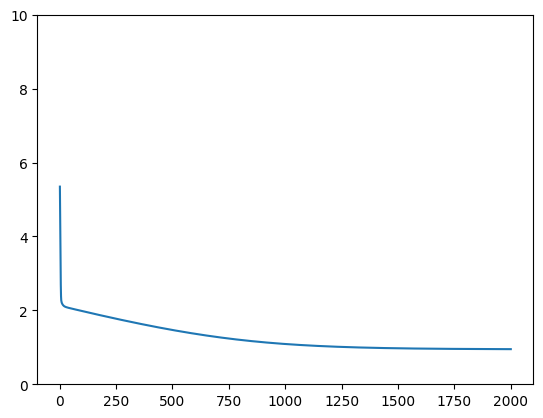

In [63]:
plt.plot(np.arange(1, epochs+1), np.log10(iter_loss))
plt.ylim((0, 10))

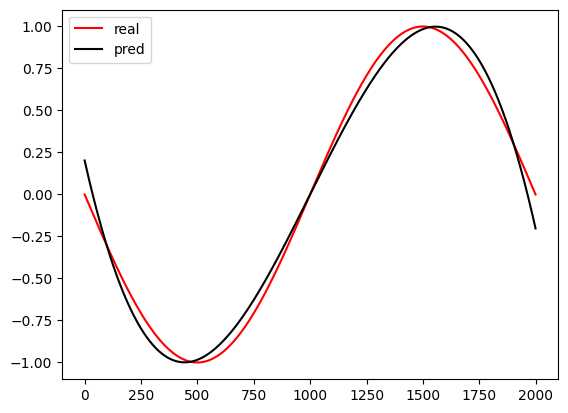

In [56]:
plt.plot(np.sin(x), color = "r", label="real")
plt.plot(y_pred, color = "k", label="pred")
plt.legend()

In [65]:
# Now use the above using torch
dtype = torch.float
device = torch.device("cpu")
device

device(type='cpu')

In [66]:
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

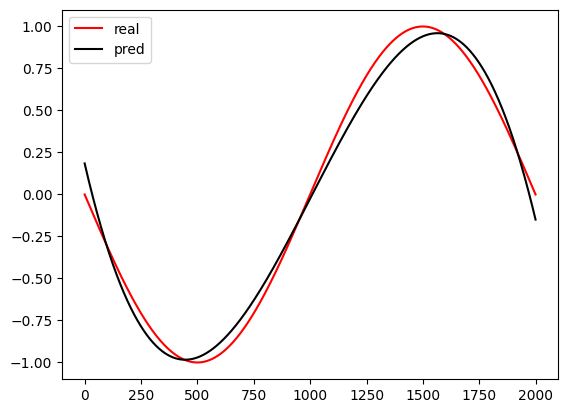

In [68]:
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)


# Training
learning_rate = 1e-6
epochs = 2000
iter_loss = torch.zeros(epochs)
for t in range(epochs):
    y_pred = a + b * x + c * x ** 2 + d * x ** 3
    
    loss = (y_pred-y).pow(2).sum().item()
    iter_loss[t] = loss
    # if t % 100 == 99:
    #     print(t, loss)
        
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()
    
    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d
    
plt.plot(np.sin(x), color = "r", label="real")
plt.plot(y_pred, color = "k", label="pred")
plt.legend()

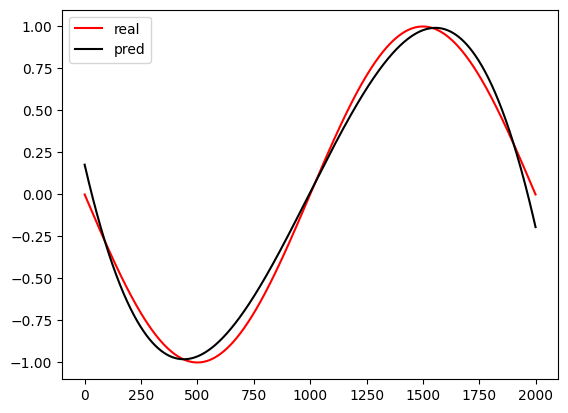

In [76]:
### We can also use the Autograd version

x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)


a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)


# Training
learning_rate = 1e-6
epochs = 2000
for t in range(epochs):
    y_pred = a + b * x + c * x ** 2 + d * x ** 3
    loss = (y_pred-y).pow(2).sum()
    loss.backward()
    
    with torch.no_grad():
    
        # Update weights
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad
        
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None
    
plt.plot(torch.sin(x), color = "r", label="real")
plt.plot(y_pred.detach().numpy(), color = "k", label="pred")
plt.legend()

In [90]:
torch.nn.Parameter?

Init signature: torch.nn.Parameter(data=None, requires_grad=True)
Docstring:     
A kind of Tensor that is to be considered a module parameter.

Parameters are :class:`~torch.Tensor` subclasses, that have a
very special property when used with :class:`Module` s - when they're
assigned as Module attributes they are automatically added to the list of
its parameters, and will appear e.g. in :meth:`~Module.parameters` iterator.
Assigning a Tensor doesn't have such effect. This is because one might
want to cache some temporary state, like last hidden state of the RNN, in
the model. If there was no such class as :class:`Parameter`, these
temporaries would get registered too.

Args:
    data (Tensor): parameter tensor.
    requires_grad (bool, optional): if the parameter requires gradient. Note that
        the torch.no_grad() context does NOT affect the default behavior of
        Parameter creation--the Parameter will still have `requires_grad=True` in
        :class:`~no_grad` mode. See :r

In [89]:
### we can do the above using an optimizer and a simple model

# Define a model
class Polynomial3Model(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))
        
        
    def forward(self, x):
        return self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3
    
    def return_string(self):
        return f"Model: y = {self.a.item():.2f} + {self.b.item():.2f}x + {self.c.item():.2f}x^2 + {self.d.item():.2f}x^3"


# Declare x and y
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Declare model
model = Polynomial3Model()
loss_fn = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6)
n_epochs = 2000
losses = torch.zeros(epochs)
for epoch in range(epochs):
    y_pred = model(x)
    
    loss = loss_fn(y_pred, y)
    losses[epoch] = loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

model.return_string()


'Model: y = 0.02 + 0.80x + -0.00x^2 + -0.08x^3'

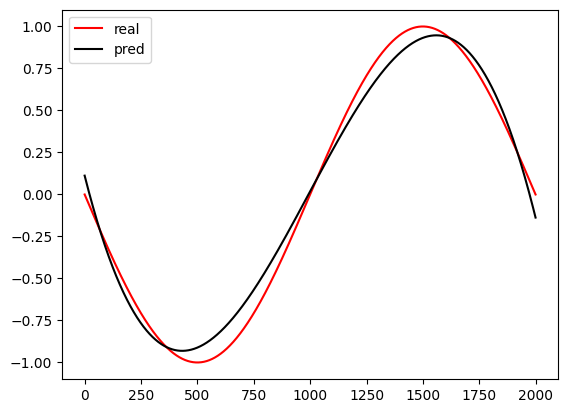

In [96]:
plt.plot(y, "r", label="real")
plt.plot(model.forward(x).detach().numpy(), "k", label="pred")
plt.legend()

## 4. Working with FashionMNIST data

In [100]:
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torchvision import datasets

In [101]:
training_data = datasets.FashionMNIST(
    root = "data",
    train=True,
    download=True,
    transform=ToTensor(),
)

test_data = datasets.FashionMNIST(
    root = "data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 26421880/26421880 [00:27<00:00, 971000.56it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 178761.82it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:06<00:00, 662025.01it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5372549.64it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [102]:
DataLoader?

Init signature: DataLoader(*args, **kwds)
Docstring:     
Data loader combines a dataset and a sampler, and provides an iterable over the given dataset.

The :class:`~torch.utils.data.DataLoader` supports both map-style and
iterable-style datasets with single- or multi-process loading, customizing
loading order and optional automatic batching (collation) and memory pinning.

See :py:mod:`torch.utils.data` documentation page for more details.

Args:
    dataset (Dataset): dataset from which to load the data.
    batch_size (int, optional): how many samples per batch to load
        (default: ``1``).
    shuffle (bool, optional): set to ``True`` to have the data reshuffled
        at every epoch (default: ``False``).
    sampler (Sampler or Iterable, optional): defines the strategy to draw
        samples from the dataset. Can be any ``Iterable`` with ``__len__``
        implemented. If specified, :attr:`shuffle` must not be specified.
    batch_sampler (Sampler or Iterable, optional): l

In [103]:
# Pass the dataset as an argument to DataLoader
batch_size = 64
train_dataloader = DataLoader(dataset=training_data, batch_size = batch_size)
test_dataloader = DataLoader(dataset=test_data, batch_size = batch_size)

In [104]:
train_dataloader?

Type:        DataLoader
String form: <torch.utils.data.dataloader.DataLoader object at 0x7fd3025fb790>
Length:      938
File:        ~/Desktop/Projects/.venv/lib/python3.8/site-packages/torch/utils/data/dataloader.py
Docstring:  
Data loader combines a dataset and a sampler, and provides an iterable over the given dataset.

The :class:`~torch.utils.data.DataLoader` supports both map-style and
iterable-style datasets with single- or multi-process loading, customizing
loading order and optional automatic batching (collation) and memory pinning.

See :py:mod:`torch.utils.data` documentation page for more details.

Args:
    dataset (Dataset): dataset from which to load the data.
    batch_size (int, optional): how many samples per batch to load
        (default: ``1``).
    shuffle (bool, optional): set to ``True`` to have the data reshuffled
        at every epoch (default: ``False``).
    sampler (Sampler or Iterable, optional): defines the strategy to draw
        samples from the data

In [105]:
for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [106]:
torch.cuda.is_available()

False

In [108]:
# Creating models
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [109]:
nn.Flatten?

Init signature: nn.Flatten(start_dim: int = 1, end_dim: int = -1) -> None
Docstring:     
Flattens a contiguous range of dims into a tensor.

For use with :class:`~nn.Sequential`, see :meth:`torch.flatten` for details.

Shape:
    - Input: :math:`(*, S_{\text{start}},..., S_{i}, ..., S_{\text{end}}, *)`,'
      where :math:`S_{i}` is the size at dimension :math:`i` and :math:`*` means any
      number of dimensions including none.
    - Output: :math:`(*, \prod_{i=\text{start}}^{\text{end}} S_{i}, *)`.

Args:
    start_dim: first dim to flatten (default = 1).
    end_dim: last dim to flatten (default = -1).

Examples::
    >>> input = torch.randn(32, 1, 5, 5)
    >>> # With default parameters
    >>> m = nn.Flatten()
    >>> output = m(input)
    >>> output.size()
    torch.Size([32, 25])
    >>> # With non-default parameters
    >>> m = nn.Flatten(0, 2)
    >>> output = m(input)
    >>> output.size()
    torch.Size([160, 5])
Init docstring: Initialize internal Module state, shared by 

In [110]:
class NN(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10))
        
    def forward(self,x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    
    
model = NN().to(device)
print(model)

NN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [111]:
model.eval()

NN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [112]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [113]:
def train_model(dataloader, model, optimizer, loss_fn):
    for inputs, labels in dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        
        loss.backward()
        optimizer.step()
    
    return None


def test_model(dataloader, model, optimizer, loss_fn):
    test_loss = 0
    correct = 0
    for inputs, labels in dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        with torch.no_grad():
            for inputs, labels in dataloader:
                inputs, labels = inputs.to(device), labels.to(device)
                
                pred = model(inputs)
                loss = loss_fn(pred, labels)
                test_loss += loss.item()
                correct += (pred.argmax(1) == labels).type(torch.float).sum().item()
            
    test_loss /= len(dataloader)
    accuracy = correct / len(dataloader.dataset)
    return test_loss, accuracy

In [117]:
epochs = 5
for epoch in range(epochs):
    print(epoch)
    train_model(train_dataloader, model, optimizer, loss_fn)
    test_loss, accuracy = test_model(test_dataloader, model, optimizer, loss_fn)
    

0
1
2
3
4


In [118]:
test_loss

169.88477873802185

In [119]:
accuracy

101.736

In [120]:
model.state_dict()

OrderedDict([('linear_relu_stack.0.weight',
              tensor([[ 0.0149,  0.0301,  0.0256,  ..., -0.0333,  0.0337,  0.0119],
                      [ 0.0169,  0.0149,  0.0306,  ..., -0.0313,  0.0307, -0.0045],
                      [-0.0266, -0.0140, -0.0102,  ..., -0.0305, -0.0151, -0.0114],
                      ...,
                      [ 0.0322, -0.0347,  0.0298,  ..., -0.0006,  0.0127,  0.0204],
                      [ 0.0018,  0.0299, -0.0282,  ..., -0.0356,  0.0061,  0.0090],
                      [ 0.0293, -0.0158, -0.0331,  ...,  0.0284, -0.0173,  0.0248]])),
             ('linear_relu_stack.0.bias',
              tensor([-2.2212e-03, -7.7749e-03, -5.0627e-04, -3.0650e-02,  2.3133e-02,
                      -2.5121e-02, -3.0595e-02, -2.4748e-04, -9.3622e-04,  2.8555e-02,
                       2.6122e-02, -8.6167e-03,  2.6448e-02, -2.2017e-02, -1.0943e-02,
                       1.9776e-02,  1.9146e-02, -2.0317e-02, -1.2976e-02,  9.8095e-03,
                       1.3485e-0

In [122]:
len(train_dataloader)

938

In [126]:
type(train_dataloader.dataset[0])

tuple

In [128]:
train_dataloader.dataset[0][0].shape

torch.Size([1, 28, 28])

In [130]:
train_dataloader.dataset[0][1]

9

In [133]:
len(train_dataloader.dataset)

60000

In [145]:
plt.imshow?

Signature:
plt.imshow(
    X,
    cmap=None,
    norm=None,
    *,
    aspect=None,
    interpolation=None,
    alpha=None,
    vmin=None,
    vmax=None,
    origin=None,
    extent=None,
    interpolation_stage=None,
    filternorm=True,
    filterrad=4.0,
    resample=None,
    url=None,
    data=None,
    **kwargs,
)
Docstring:
Display data as an image, i.e., on a 2D regular raster.

The input may either be actual RGB(A) data, or 2D scalar data, which
will be rendered as a pseudocolor image. For displaying a grayscale
image set up the colormapping using the parameters
``cmap='gray', vmin=0, vmax=255``.

The number of pixels used to render an image is set by the Axes size
and the *dpi* of the figure. This can lead to aliasing artifacts when
the image is resampled because the displayed image size will usually
not match the size of *X* (see
:doc:`/gallery/images_contours_and_fields/image_antialiasing`).
The resampling can be controlled via the *interpolation* parameter
and/or :rc:`imag

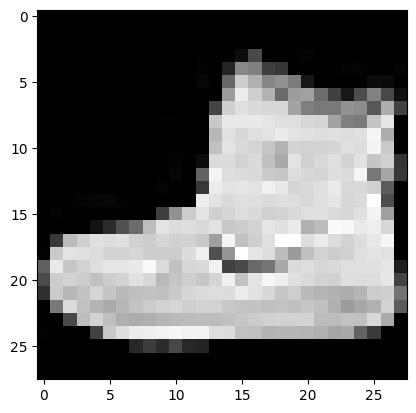

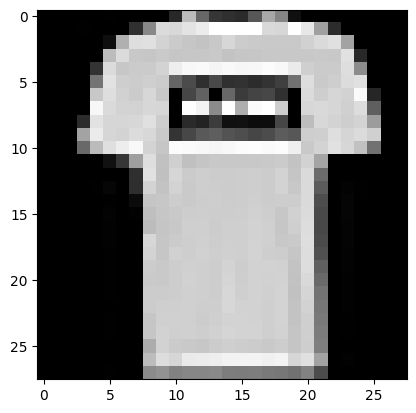

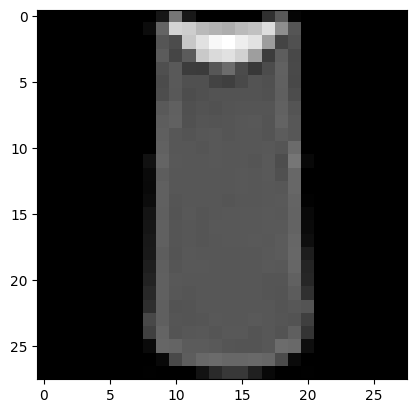

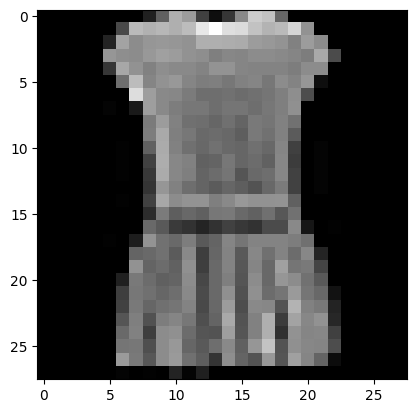

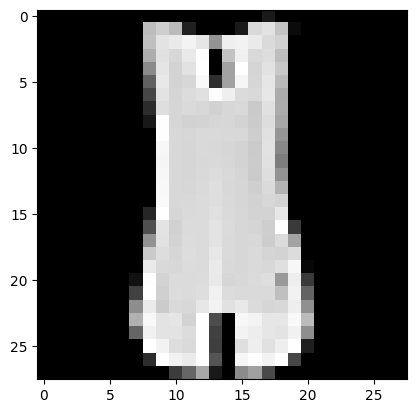

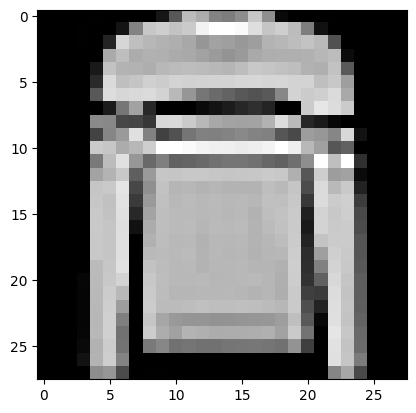

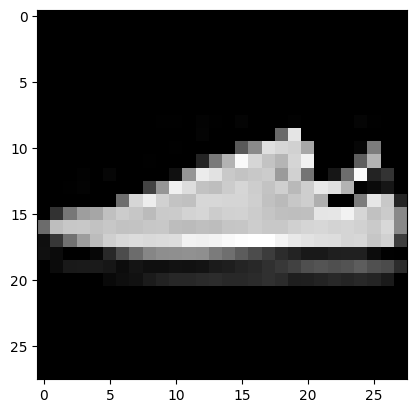

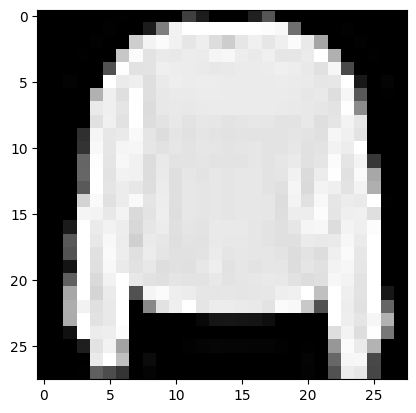

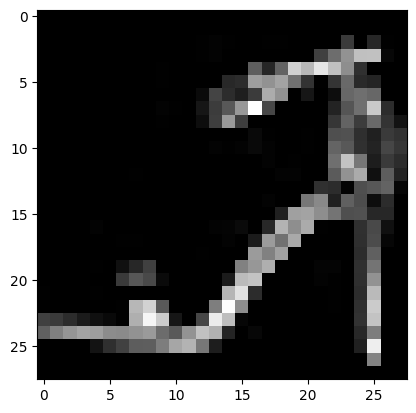

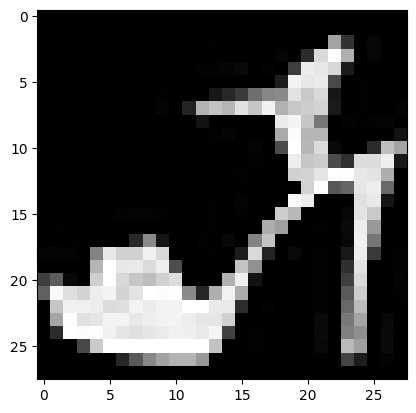

In [148]:
for i in range(10):
    plt.figure()
    plt.imshow(train_dataloader.dataset[i][0].numpy().squeeze(), cmap="gray")